In [1]:
%matplotlib inline

In [2]:
import lightkurve as lk

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
search_ffi = lk.search_tesscut('TIC 461517149')

In [6]:
search_ffi

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 19,2019,TESScut,1426,TIC 461517149,0.0
1,TESS Sector 20,2019,TESScut,1426,TIC 461517149,0.0
2,TESS Sector 25,2020,TESScut,1426,TIC 461517149,0.0
3,TESS Sector 26,2020,TESScut,1426,TIC 461517149,0.0
4,TESS Sector 40,2021,TESScut,475,TIC 461517149,0.0
5,TESS Sector 47,2021,TESScut,475,TIC 461517149,0.0
6,TESS Sector 52,2022,TESScut,475,TIC 461517149,0.0
7,TESS Sector 53,2022,TESScut,475,TIC 461517149,0.0
8,TESS Sector 59,2022,TESScut,158,TIC 461517149,0.0


In [7]:
search_tpf = lk.search_targetpixelfile('TIC 461517149')

In [8]:
search_tpf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 60,2022,SPOC,120,461517149,0.0


In [9]:
search_lcf = lk.search_lightcurve('TIC 461517149')

In [10]:
search_lcf

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 19,2019,QLP,1800,461517149,0.0
1,TESS Sector 20,2019,QLP,1800,461517149,0.0
2,TESS Sector 25,2020,QLP,1800,461517149,0.0
3,TESS Sector 26,2020,QLP,1800,461517149,0.0
4,TESS Sector 26,2020,TASOC,1800,461517149,0.0
5,TESS Sector 26,2020,TASOC,1800,461517149,0.0
6,TESS Sector 40,2021,QLP,600,461517149,0.0
7,TESS Sector 47,2021,QLP,600,461517149,0.0
8,TESS Sector 60,2022,SPOC,120,461517149,0.0


In [11]:
search_lcf_refined = lk.search_lightcurve('TIC 461517149', author="SPOC", exptime=120)

In [12]:
search_lcf_refined

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,TESS Sector 60,2022,SPOC,120,461517149,0.0


In [13]:
lcf = search_lcf_refined.download_all()

In [14]:
lcf

LightCurveCollection of 1 objects:
    0: <TessLightCurve LABEL="TIC 461517149" SECTOR=60 AUTHOR=SPOC FLUX_ORIGIN=pdcsap_flux>

In [15]:
lcf[0]

time,flux,flux_err,timecorr,cadenceno,centroid_col,centroid_row,sap_flux,sap_flux_err,sap_bkg,sap_bkg_err,pdcsap_flux,pdcsap_flux_err,quality,psf_centr1,psf_centr1_err,psf_centr2,psf_centr2_err,mom_centr1,mom_centr1_err,mom_centr2,mom_centr2_err,pos_corr1,pos_corr2
,electron / s,electron / s,d,,pix,pix,electron / s,electron / s,electron / s,electron / s,electron / s,electron / s,,pix,pix,pix,pix,pix,pix,pix,pix,pix,pix
Time,float32,float32,float32,int32,float64,float64,float32,float32,float32,float32,float32,float32,int32,float64,float32,float64,float32,float64,float32,float64,float32,float32,float32
2936.905558211967,———,———,2.2090999e-03,1230803,1001.65005,2009.44941,2.9453639e+04,2.0329082e+01,2.4587927e+03,6.8746257e+00,———,———,1000000000000000,———,———,———,———,1001.65005,6.2791252e-04,2009.44941,5.8211474e-04,-1.6532704e-02,1.7128807e-02
2936.906947089751,———,———,2.2090895e-03,1230804,1001.65517,2009.45140,2.9395736e+04,2.0311716e+01,2.4666123e+03,6.8731518e+00,———,———,1000000000000000,———,———,———,———,1001.65517,6.2831171e-04,2009.45140,5.8243977e-04,-1.1450350e-02,1.8875405e-02
2936.908335967768,———,———,2.2090792e-03,1230805,1001.65276,2009.45253,2.9454947e+04,2.0332657e+01,2.4694756e+03,6.8802176e+00,———,———,1000000000000000,———,———,———,———,1001.65276,6.2804628e-04,2009.45253,5.8227108e-04,-1.3876970e-02,1.9235469e-02
2936.9097248455523,———,———,2.2090687e-03,1230806,1001.65491,2009.45267,2.9393447e+04,2.0323572e+01,2.4728081e+03,6.8988838e+00,———,———,1000000000000000,———,———,———,———,1001.65491,6.2781776e-04,2009.45267,5.8270915e-04,-9.4016651e-03,1.9643206e-02
2936.9111137233367,———,———,2.2090583e-03,1230807,1001.65137,2009.44861,2.9416818e+04,2.0320103e+01,2.4693921e+03,6.8791327e+00,———,———,1000000000000000,———,———,———,———,1001.65137,6.2850572e-04,2009.44861,5.8241404e-04,-1.5624308e-02,1.6958371e-02
2936.9125026011207,———,———,2.2090478e-03,1230808,1001.65666,2009.44870,2.9413586e+04,2.0314560e+01,2.4623604e+03,6.8750830e+00,———,———,1000000000000000,———,———,———,———,1001.65666,6.2781165e-04,2009.44870,5.8242568e-04,-9.8919980e-03,1.5820855e-02
2936.9138914789046,———,———,2.2090373e-03,1230809,1001.65154,2009.44858,2.9396434e+04,2.0310255e+01,2.4564990e+03,6.8740859e+00,———,———,1000000000000000,———,———,———,———,1001.65154,6.2829169e-04,2009.44858,5.8242359e-04,-1.5718658e-02,1.5249621e-02
2936.9152803566894,———,———,2.2090268e-03,1230810,1001.65645,2009.45522,2.9467250e+04,2.0329229e+01,2.4613538e+03,6.8659630e+00,———,———,1000000000000000,———,———,———,———,1001.65645,6.2685116e-04,2009.45522,5.8171764e-04,-1.0561729e-02,2.2052761e-02


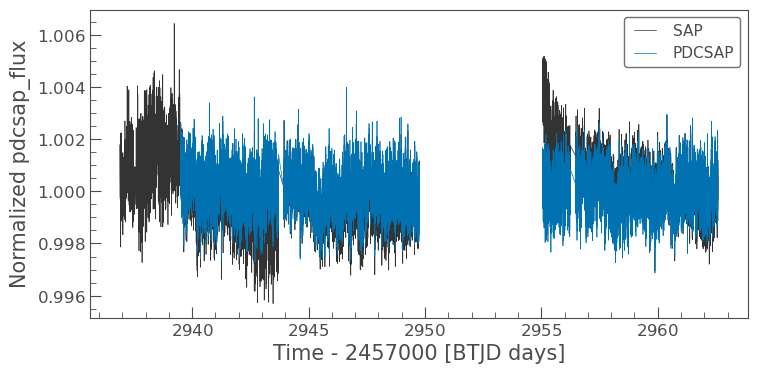

In [16]:
ax = lcf[0].plot(column='sap_flux', normalize=True, label="SAP");
lcf[0].plot(ax=ax, column='pdcsap_flux', normalize=True, label="PDCSAP");

Text(0.5, 1.0, 'PDCSAP light curve of TIC 461517149')

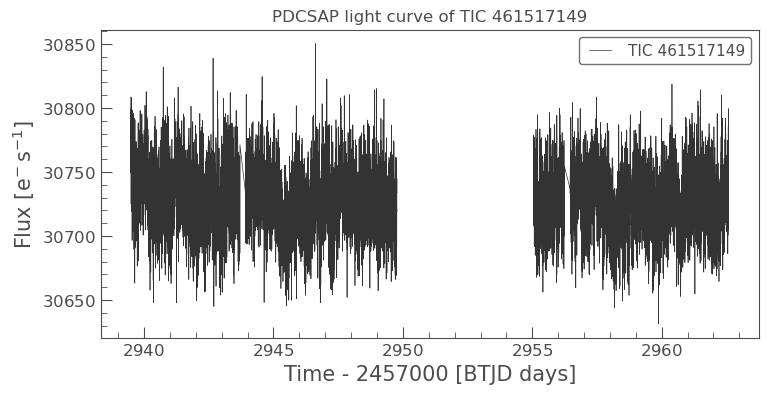

In [17]:
ax = lcf[0].plot() 
ax.set_title("PDCSAP light curve of TIC 461517149")

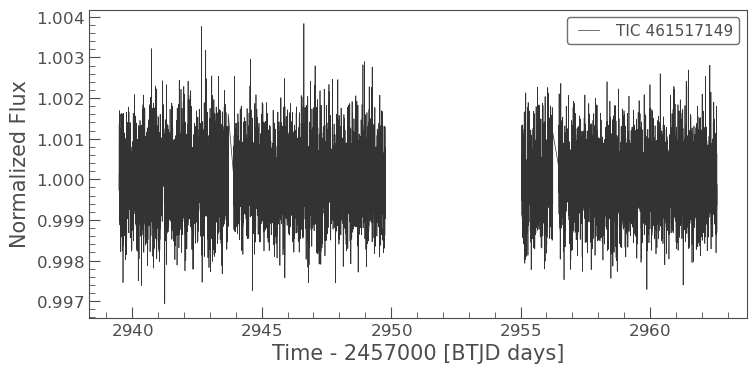

In [18]:
flat_lc = lcf[0].flatten(window_length=401)
flat_lc.plot();

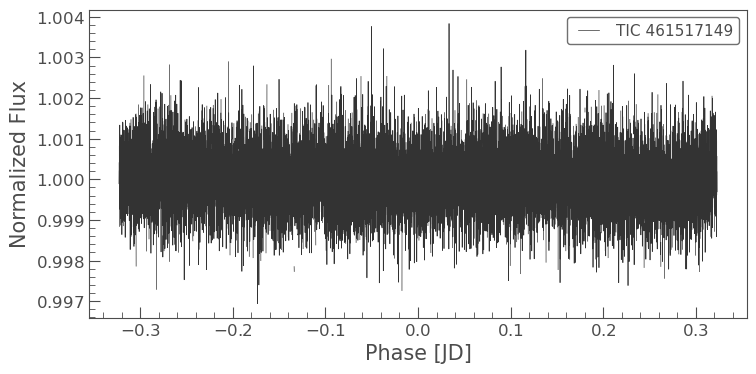

In [19]:
folded_lc = flat_lc.fold(period=0.646)
folded_lc.plot();

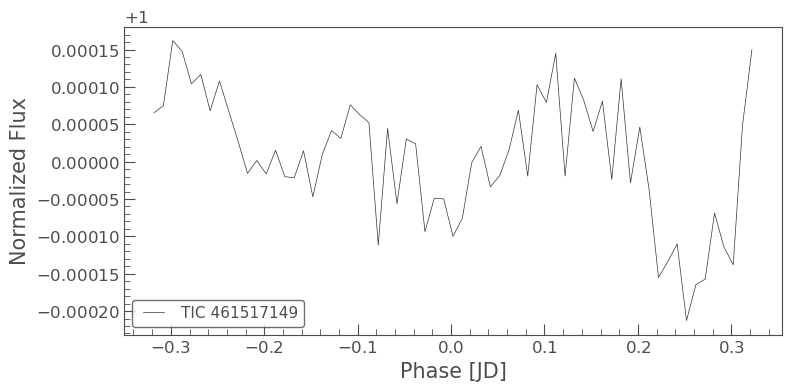

In [20]:
binned_lc = folded_lc.bin(time_bin_size=0.01)
binned_lc.plot();

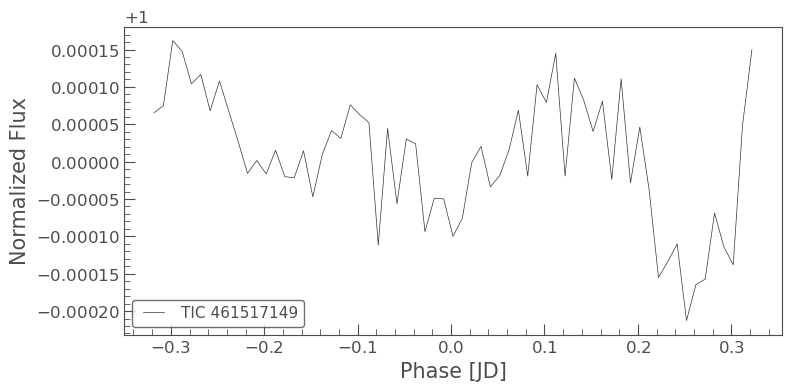

In [21]:
lcf[0].flatten(window_length=401).fold(period=0.646).bin(time_bin_size=0.01).plot();

In [22]:
lcf[0].interact_bls()

In [23]:
ffi_data = search_ffi[1].download(cutout_size=10)

<AxesSubplot:title={'center':'Target ID: TIC 461517149, Cadence: 0'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

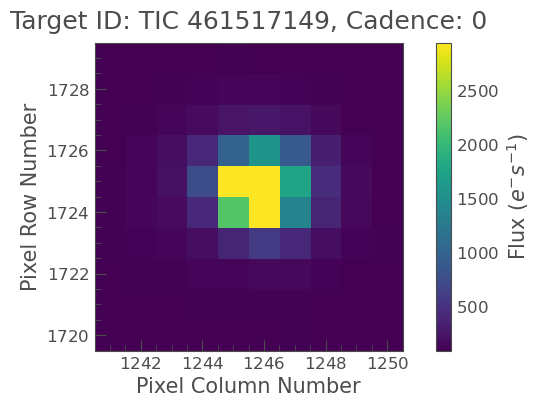

In [24]:
ffi_data.plot()

In [25]:
target_mask = ffi_data.create_threshold_mask(threshold=15, reference_pixel='center')
n_target_pixels = target_mask.sum()
n_target_pixels

15

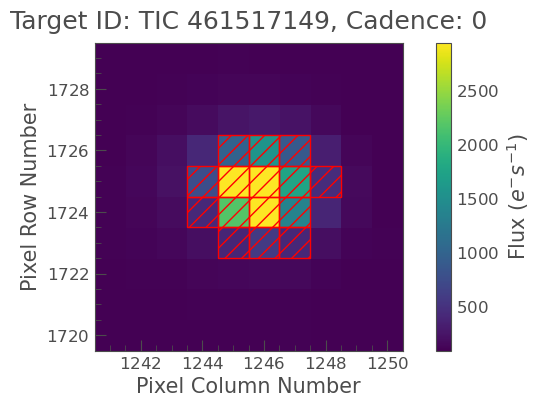

In [26]:
ffi_data.plot(aperture_mask=target_mask, mask_color='r');

In [27]:
ffi_lc = ffi_data.to_lightcurve(aperture_mask=target_mask)

In [28]:
ffi_lc

time,flux,flux_err,centroid_col,centroid_row,cadenceno,quality
,electron / s,electron / s,pix,pix,,
Time,float32,float32,float64,float64,int32,int32
1842.533447265625,28902.3359375,4.957415580749512,1245.7901465414218,1724.7612777802397,0,0
1842.5542602539062,28909.16796875,4.957250118255615,1245.7896623328193,1724.762596013112,1,0
1842.5751342773438,28864.515625,4.954555034637451,1245.7901128720846,1724.76395399685,2,0
1842.595947265625,28891.796875,4.960816383361816,1245.7884477901957,1724.7633648295855,3,0
1842.6167602539062,28880.62109375,4.960084915161133,1245.7882597337737,1724.7629601161416,4,0
1842.6376342773438,28904.392578125,4.959561347961426,1245.7885096799548,1724.765684091635,5,0
1842.658447265625,28898.39453125,4.95715856552124,1245.7863278706552,1724.7606686023898,6,0
1842.6792602539062,28932.4296875,4.960703372955322,1245.7872818301923,1724.764284751626,7,0


<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

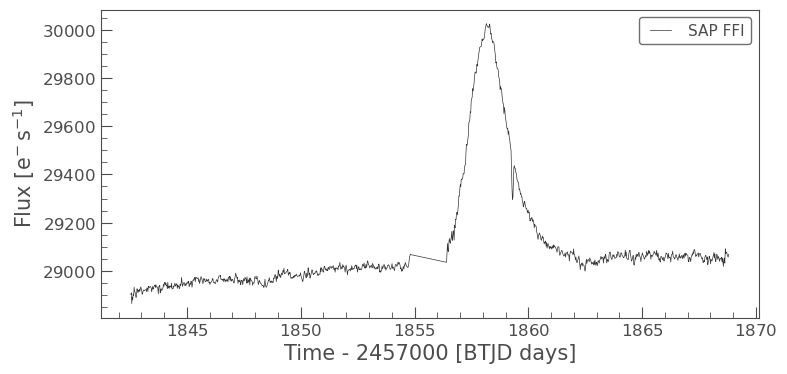

In [29]:
ffi_lc.plot(label="SAP FFI")

<AxesSubplot:xlabel='Time - 2457000 [BTJD days]', ylabel='Normalized Flux'>

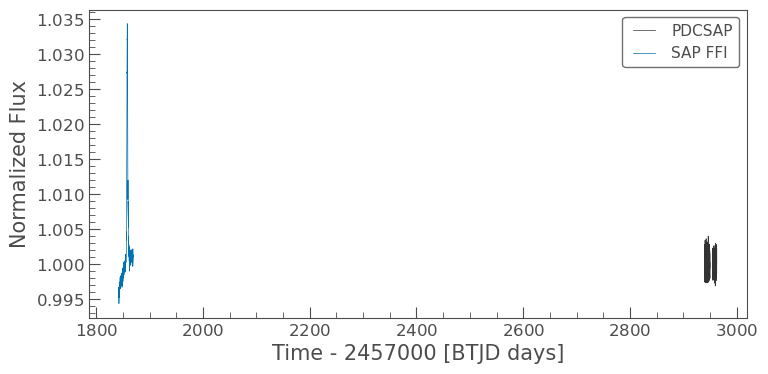

In [30]:
ax = lcf[0].plot(column='pdcsap_flux', normalize=True, label="PDCSAP");
ffi_lc.plot(ax=ax, normalize=True, label="SAP FFI")

In [31]:
ffi_data.interact()

In [32]:
ffi_data.interact_sky()

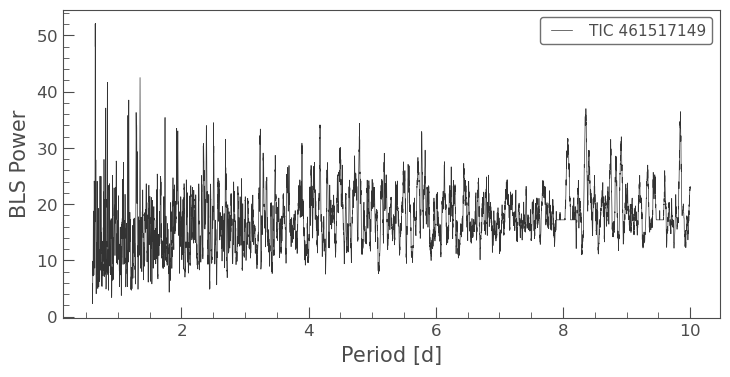

In [33]:
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(0.6, 10, 0.001))
periodogram.plot();

In [34]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}' .format(best_fit_period))

Best fit period: 0.646 d


C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:545: LightkurveWarning: interact_sky() - cannot obtain nearby TICs. Skip it. The error: not enough values to unpack (expected 3, got 2)
  warnings.warn(
C:\Users\andre\anaconda3\lib\site-packages\lightkurve\interact.py:631: LightkurveWarning: Proper motion correction cannot be applied to the target, as none is available. Thus the target (the cross) might be noticeably away from its actual position, if it has large proper motion.
  warnings.warn(("Proper motion correction cannot be applied to the target, as none is available. "
